<a href="https://colab.research.google.com/github/helmitareq/Stock-Price-Forecasting-of-GoTo-Using-LSTM-and-Adam-Optimizer-with-Multivariate-Time-Series/blob/main/GOTO_Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data**

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# **Import Data**

In [192]:
df = pd.read_csv('GOTO.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-05,123.0,123.0,123.0,123.0,123.0,172815100
1,2022-12-06,115.0,115.0,115.0,115.0,115.0,188696800
2,2022-12-07,107.0,107.0,107.0,107.0,107.0,248475200
3,2022-12-08,100.0,100.0,100.0,100.0,100.0,482718800
4,2022-12-09,93.0,93.0,93.0,93.0,93.0,280769900
...,...,...,...,...,...,...,...
489,2024-12-18,70.0,72.0,69.0,70.0,70.0,1909298200
490,2024-12-19,69.0,70.0,67.0,68.0,68.0,3854282200
491,2024-12-20,69.0,71.0,68.0,69.0,69.0,2981674400
492,2024-12-23,70.0,72.0,69.0,71.0,71.0,3155772300


# **Understanding Data**

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       494 non-null    object 
 1   Open       494 non-null    float64
 2   High       494 non-null    float64
 3   Low        494 non-null    float64
 4   Close      494 non-null    float64
 5   Adj Close  494 non-null    float64
 6   Volume     494 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.1+ KB


# **Preparation Data**

In [194]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [195]:
df.duplicated().sum()

0

In [196]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2022-12-05 to 2024-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       494 non-null    float64
 1   High       494 non-null    float64
 2   Low        494 non-null    float64
 3   Close      494 non-null    float64
 4   Adj Close  494 non-null    float64
 5   Volume     494 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.0 KB


In [197]:
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,123.0,123.0,123.0,123.0,123.0,172815100
2022-12-06,115.0,115.0,115.0,115.0,115.0,188696800
2022-12-07,107.0,107.0,107.0,107.0,107.0,248475200
2022-12-08,100.0,100.0,100.0,100.0,100.0,482718800
2022-12-09,93.0,93.0,93.0,93.0,93.0,280769900


In [198]:
df['Log_Volume'] = np.log(df['Volume'])
df.drop(columns = ['Volume'], inplace = True)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2022-12-05,123.0,123.0,123.0,123.0,123.0,18.967733
2022-12-06,115.0,115.0,115.0,115.0,115.0,19.055652
2022-12-07,107.0,107.0,107.0,107.0,107.0,19.330854
2022-12-08,100.0,100.0,100.0,100.0,100.0,19.994945
2022-12-09,93.0,93.0,93.0,93.0,93.0,19.453046


In [200]:
df.info()
print(np.isinf(df).sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2022-12-05 to 2024-12-24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        494 non-null    float64
 1   High        494 non-null    float64
 2   Low         494 non-null    float64
 3   Close       494 non-null    float64
 4   Adj Close   494 non-null    float64
 5   Log_Volume  494 non-null    float64
dtypes: float64(6)
memory usage: 27.0 KB
Open          0
High          0
Low           0
Close         0
Adj Close     0
Log_Volume    3
dtype: int64


In [201]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(np.isinf(df).sum())

Open          0
High          0
Low           0
Close         0
Adj Close     0
Log_Volume    0
dtype: int64


In [202]:
print(df.isnull().sum())

Open          0
High          0
Low           0
Close         0
Adj Close     0
Log_Volume    3
dtype: int64


In [204]:
df.fillna(df.median(), inplace=True)
print(df.isnull().sum())
print(np.isinf(df).sum())

Open          0
High          0
Low           0
Close         0
Adj Close     0
Log_Volume    0
dtype: int64
Open          0
High          0
Low           0
Close         0
Adj Close     0
Log_Volume    0
dtype: int64


In [205]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[df.columns])

In [206]:
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
df_scaled

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2022-12-05,0.901235,0.752577,0.935897,0.752577,0.752577,0.002618
2022-12-06,0.802469,0.670103,0.833333,0.670103,0.670103,0.002859
2022-12-07,0.703704,0.587629,0.730769,0.587629,0.587629,0.003764
2022-12-08,0.617284,0.515464,0.641026,0.515464,0.515464,0.007313
2022-12-09,0.530864,0.443299,0.551282,0.443299,0.443299,0.004253
...,...,...,...,...,...,...
2024-12-18,0.246914,0.226804,0.243590,0.206186,0.206186,0.028924
2024-12-19,0.234568,0.206186,0.217949,0.185567,0.185567,0.058389
2024-12-20,0.234568,0.216495,0.230769,0.195876,0.195876,0.045169


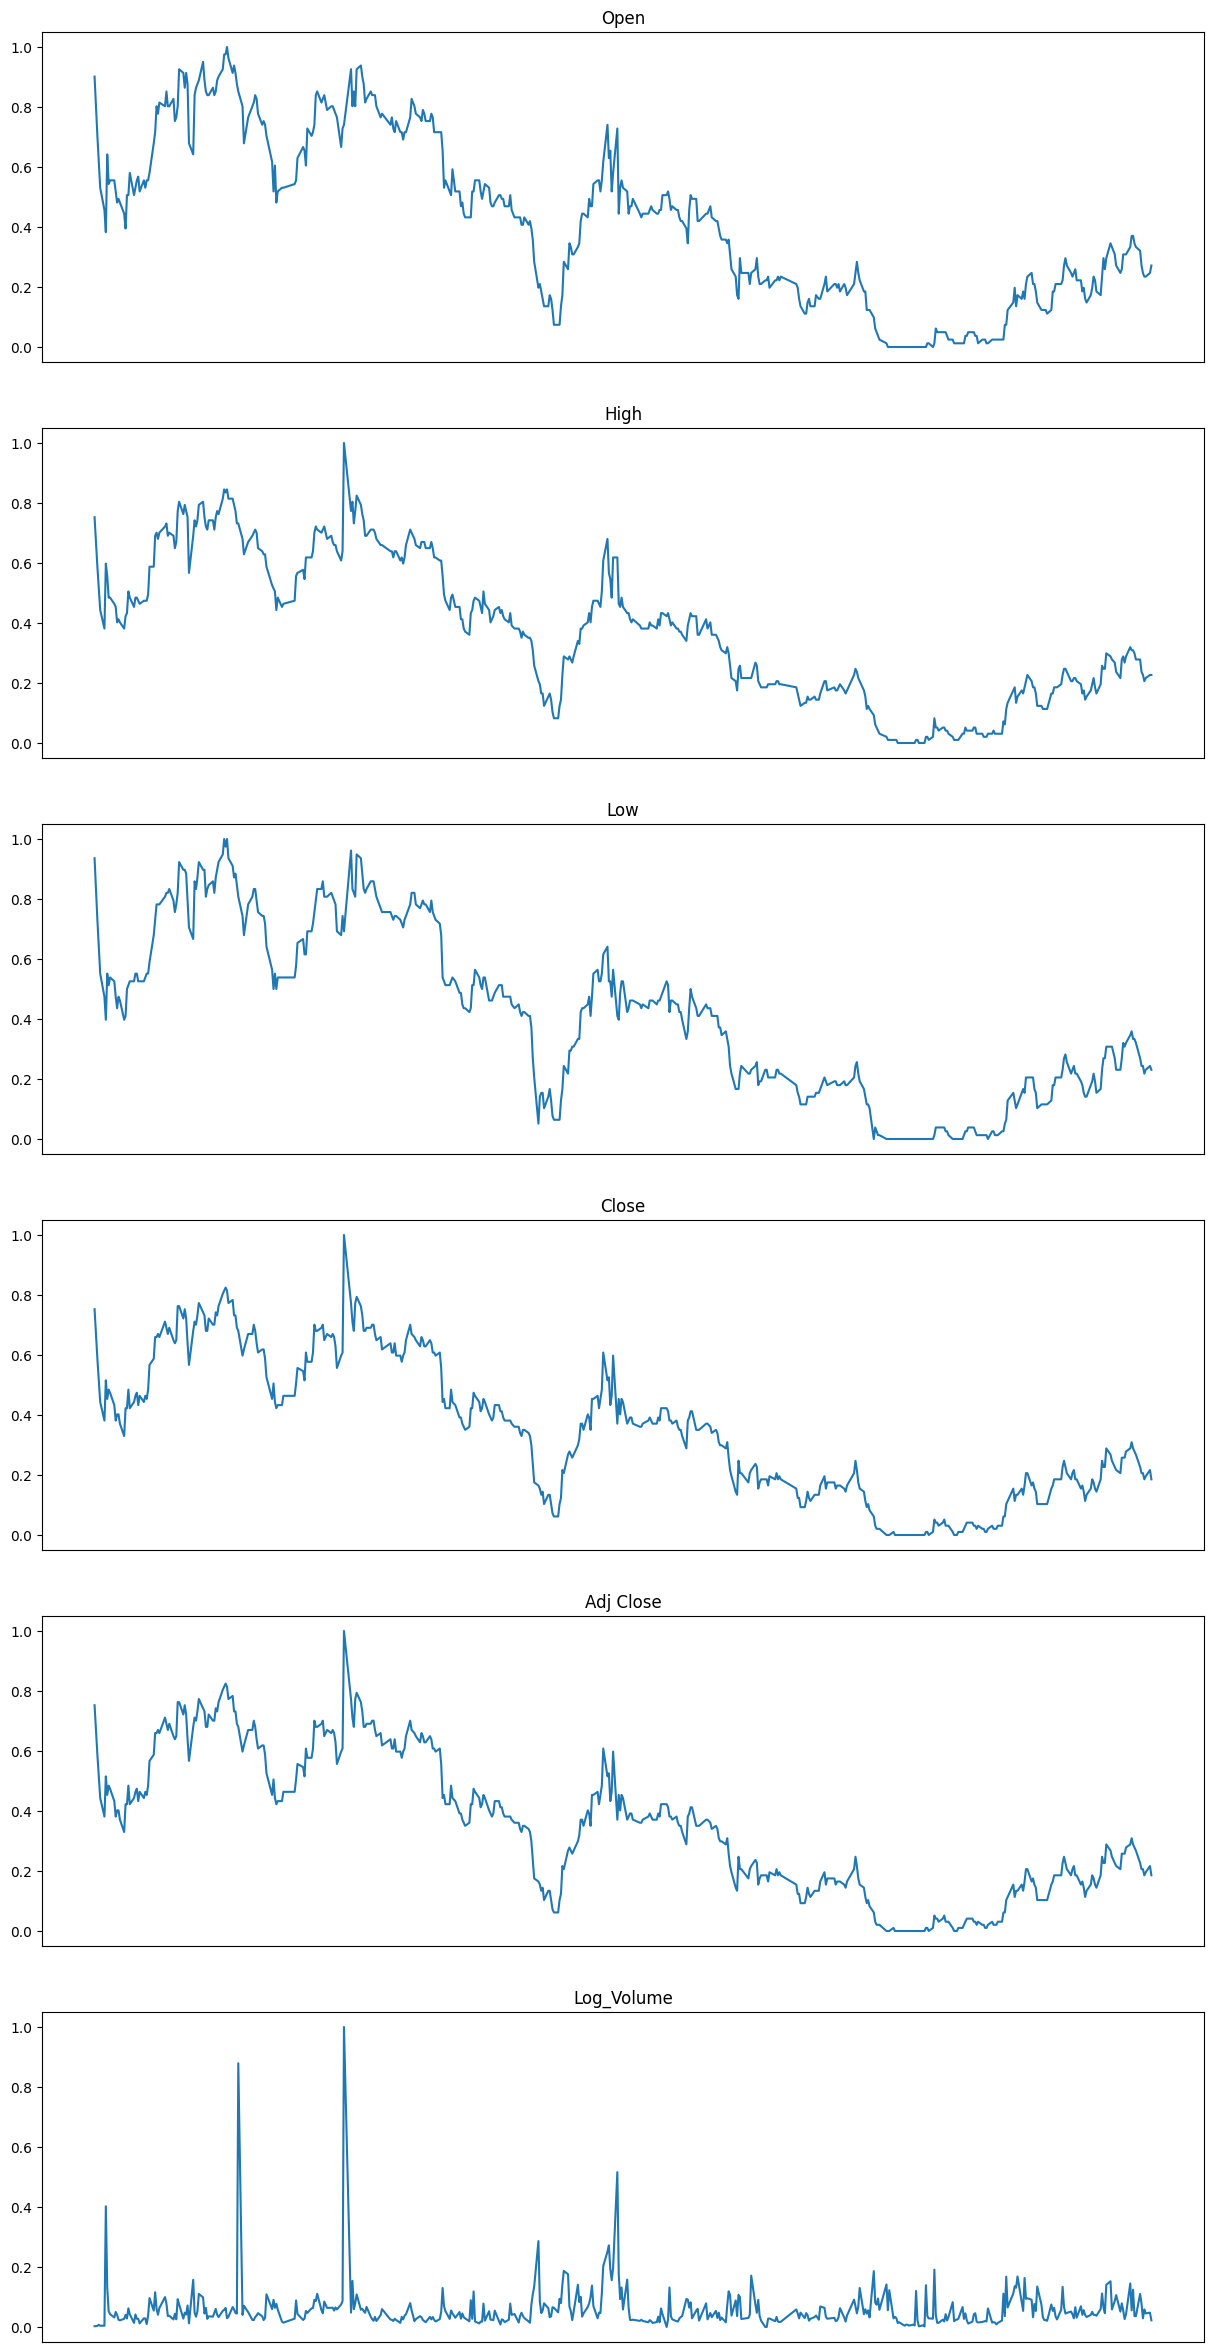

In [207]:
plt.rcParams['figure.figsize'] = (15,30)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [208]:
def create_sequences(data, window_size):
  x = []
  y = []
  for i in range(window_size, len(data)):
    x.append(data.iloc[i-window_size:i].values)
    y.append(data.iloc[i].values)
  return np.array(x), np.array(y)

In [209]:
x, y = create_sequences(df_scaled, 60)

In [210]:
print(x.shape)
print(y.shape)

(434, 60, 6)
(434, 6)


# **Modeling & Evaluation**

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [223]:
model = keras.Sequential([
    keras.layers.LSTM(32, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.Dropout(0.1),

    keras.layers.LSTM(32, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.Dropout(0.1),

    keras.layers.LSTM(32, return_sequences=False),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(y_train.shape[1])
])

In [224]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])

In [225]:
earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=10,
                              restore_best_weights=True)

lstm_model = model.fit(x_train, y_train,
                       epochs=100,
                       batch_size=16,
                       validation_split=0.2,
                       callbacks=[earlyStopping])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - RootMeanSquaredError: 0.2700 - loss: 0.0757 - val_RootMeanSquaredError: 0.1123 - val_loss: 0.0126
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - RootMeanSquaredError: 0.1294 - loss: 0.0169 - val_RootMeanSquaredError: 0.0930 - val_loss: 0.0086
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - RootMeanSquaredError: 0.1102 - loss: 0.0122 - val_RootMeanSquaredError: 0.0901 - val_loss: 0.0081
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - RootMeanSquaredError: 0.1094 - loss: 0.0120 - val_RootMeanSquaredError: 0.0868 - val_loss: 0.0075
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - RootMeanSquaredError: 0.0985 - loss: 0.0097 - val_RootMeanSquaredError: 0.0895 - val_loss: 0.0080
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - RootMeanSquaredError: 0.1040 - loss: 0.0108 - val_RootMeanSquaredError: 0.0812 - val_loss: 0.0066
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - RootMeanSquaredError: 0.1015 - 

# **Forecasting**

In [227]:
predictions = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [228]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

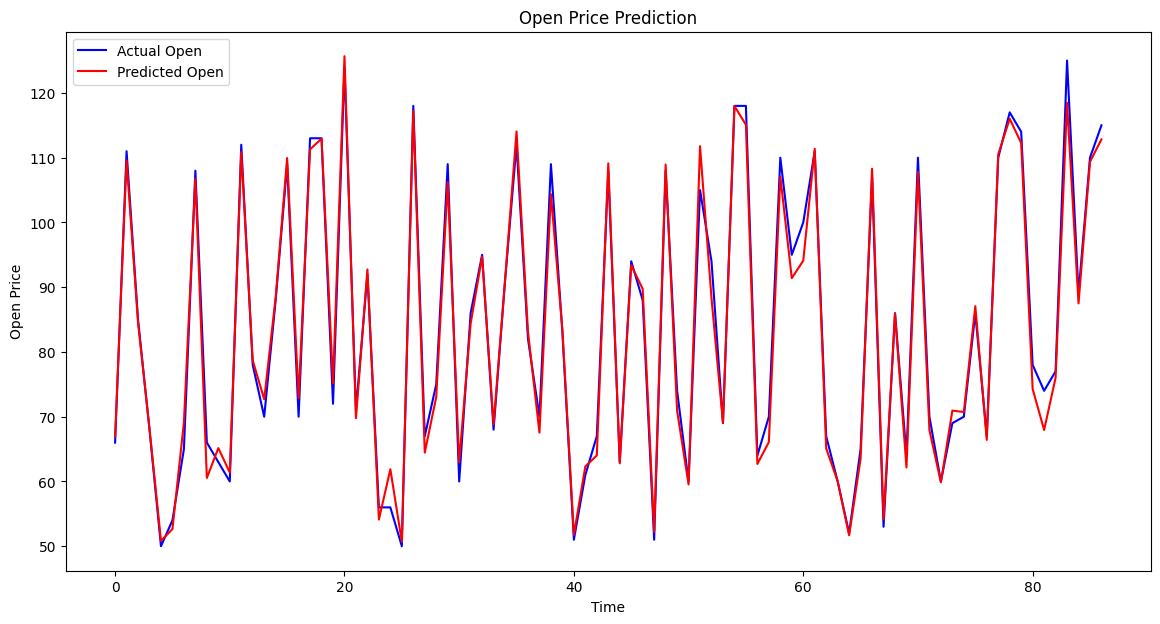

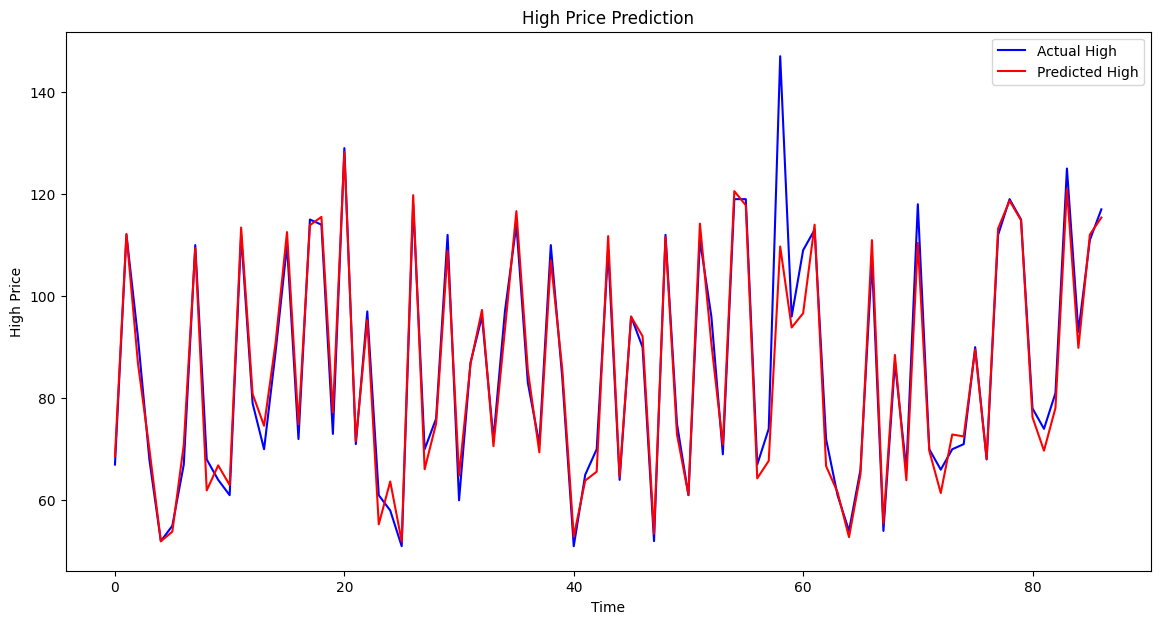

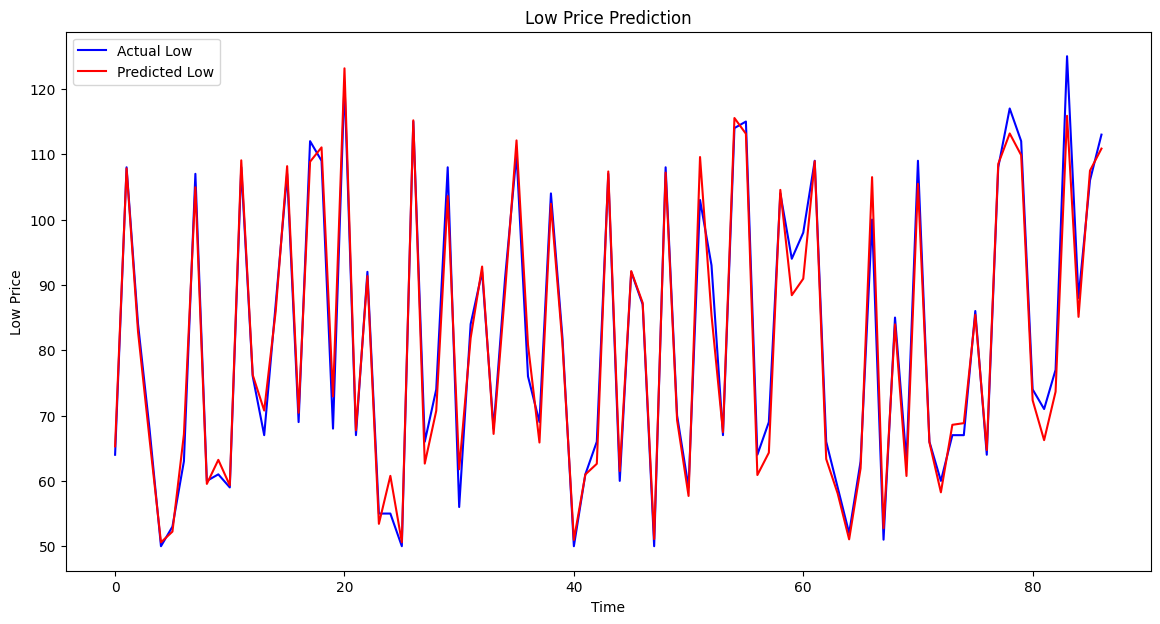

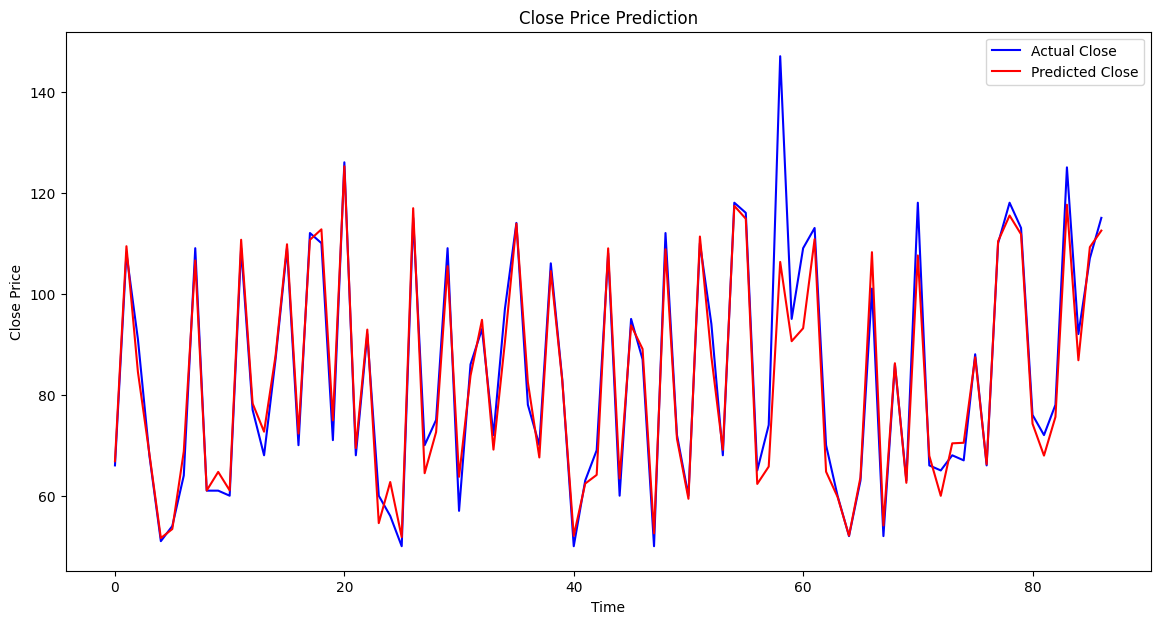

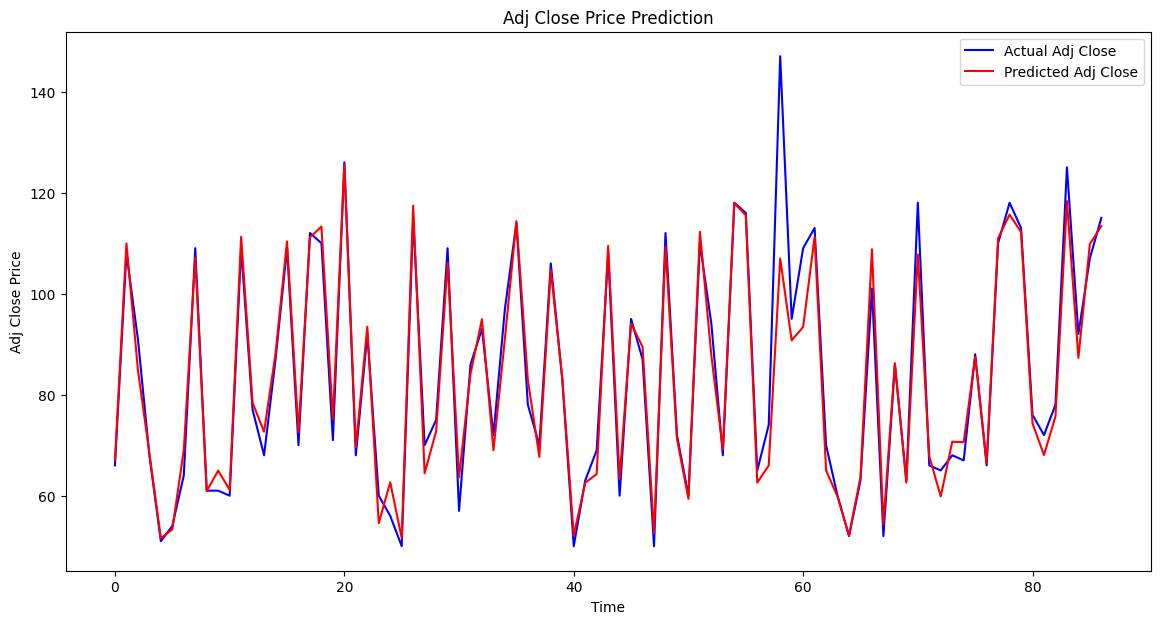

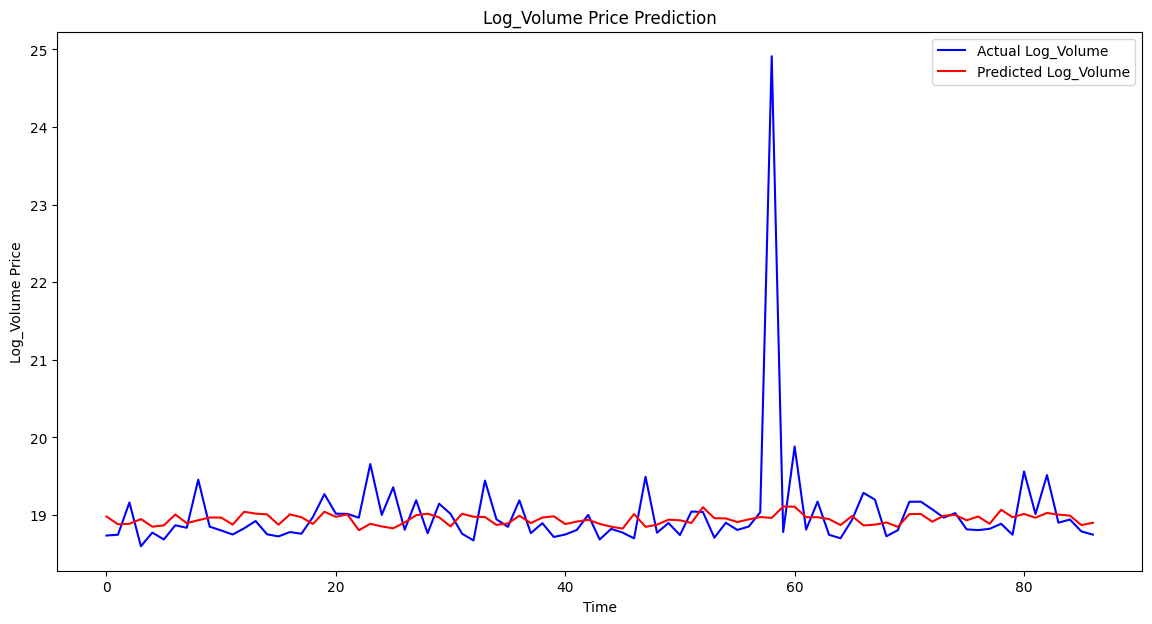

In [229]:
for i, col in enumerate(df_scaled.columns):
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()
    plt.show()